In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gpt_n = 1282
claude_n = 1239
sans_n = 3965
sans_image_n = 950
ns = gpt_n, claude_n, sans_image_n

In [3]:
red = "#ae1a1fff"
red_helper_1 = "#cc4125ff"
red_helper_2 = "#6e1517ff"
yellow = "#e69138ff"
blue = "#3c78d8ff"
grey = "#999999ff"
green = "#00a67eff"
brown = "#b85c00ff"

In [4]:
models = {"llava_med": "LLaVA-Med",
          "llava_next": "LLaVA-Next",
          "llava_next_med": "LLaVA-Next-Med\n[1, 3, 0]",
          "cns_obsidian_base": "CNS-Obsidian\n[1, 3, 3]-gpt",
          "cns_obsidian_gpt": "CNS-Obsidian\n[5, 10, 10]-gpt",
          "cns_obsidian_both": "CNS-Obsidian\n[5, 10, 10]-both",
          "gpt_4o": "GPT-4o",
          "sonnet": "Sonnet-3.5"}
gpt_perf = {"llava_med": 0.4274,
            "llava_next": 0.6873,
            "llava_next_med": 0.6896,
            "cns_obsidian_base": 0.7641,
            "cns_obsidian_gpt": 0.7910,
            "cns_obsidian_both": 0.7918,
            "gpt_4o": 0.8116,
            "sonnet": 0.8171}
claude_perf = {"llava_med": 0.2912,
               "llava_next": 0.4653,
               "llava_next_med": 0.5307,
                "cns_obsidian_base": 0.6640,
                "cns_obsidian_gpt": 0.7068,
                "cns_obsidian_both": 0.7439,
               "gpt_4o": 0.6448,
               "sonnet": 0.6392}
# sans_perf = {"llava_med": 0.0420,
#              "llava_next": 0.5949,
#              "llava_next_med": 0.6002,
#              "cns_obsidian_base": 0.6091,
#              "cns_obsidian_gpt": 
#              "cns_obsidian_both": 0.6409,
#              "gpt_4o": 0.8154,
#              "sonnet": 0.7694}
sans_image_perf = {"llava_med": 0.2874,
             "llava_next": 0.3981,
             "llava_next_med": 0.4398,
             "cns_obsidian_base": 0.4463,
             "cns_obsidian_gpt": 0.4681,
             "cns_obsidian_both": 0.4525,
             "gpt_4o": 0.656,
             "sonnet": 0.562}

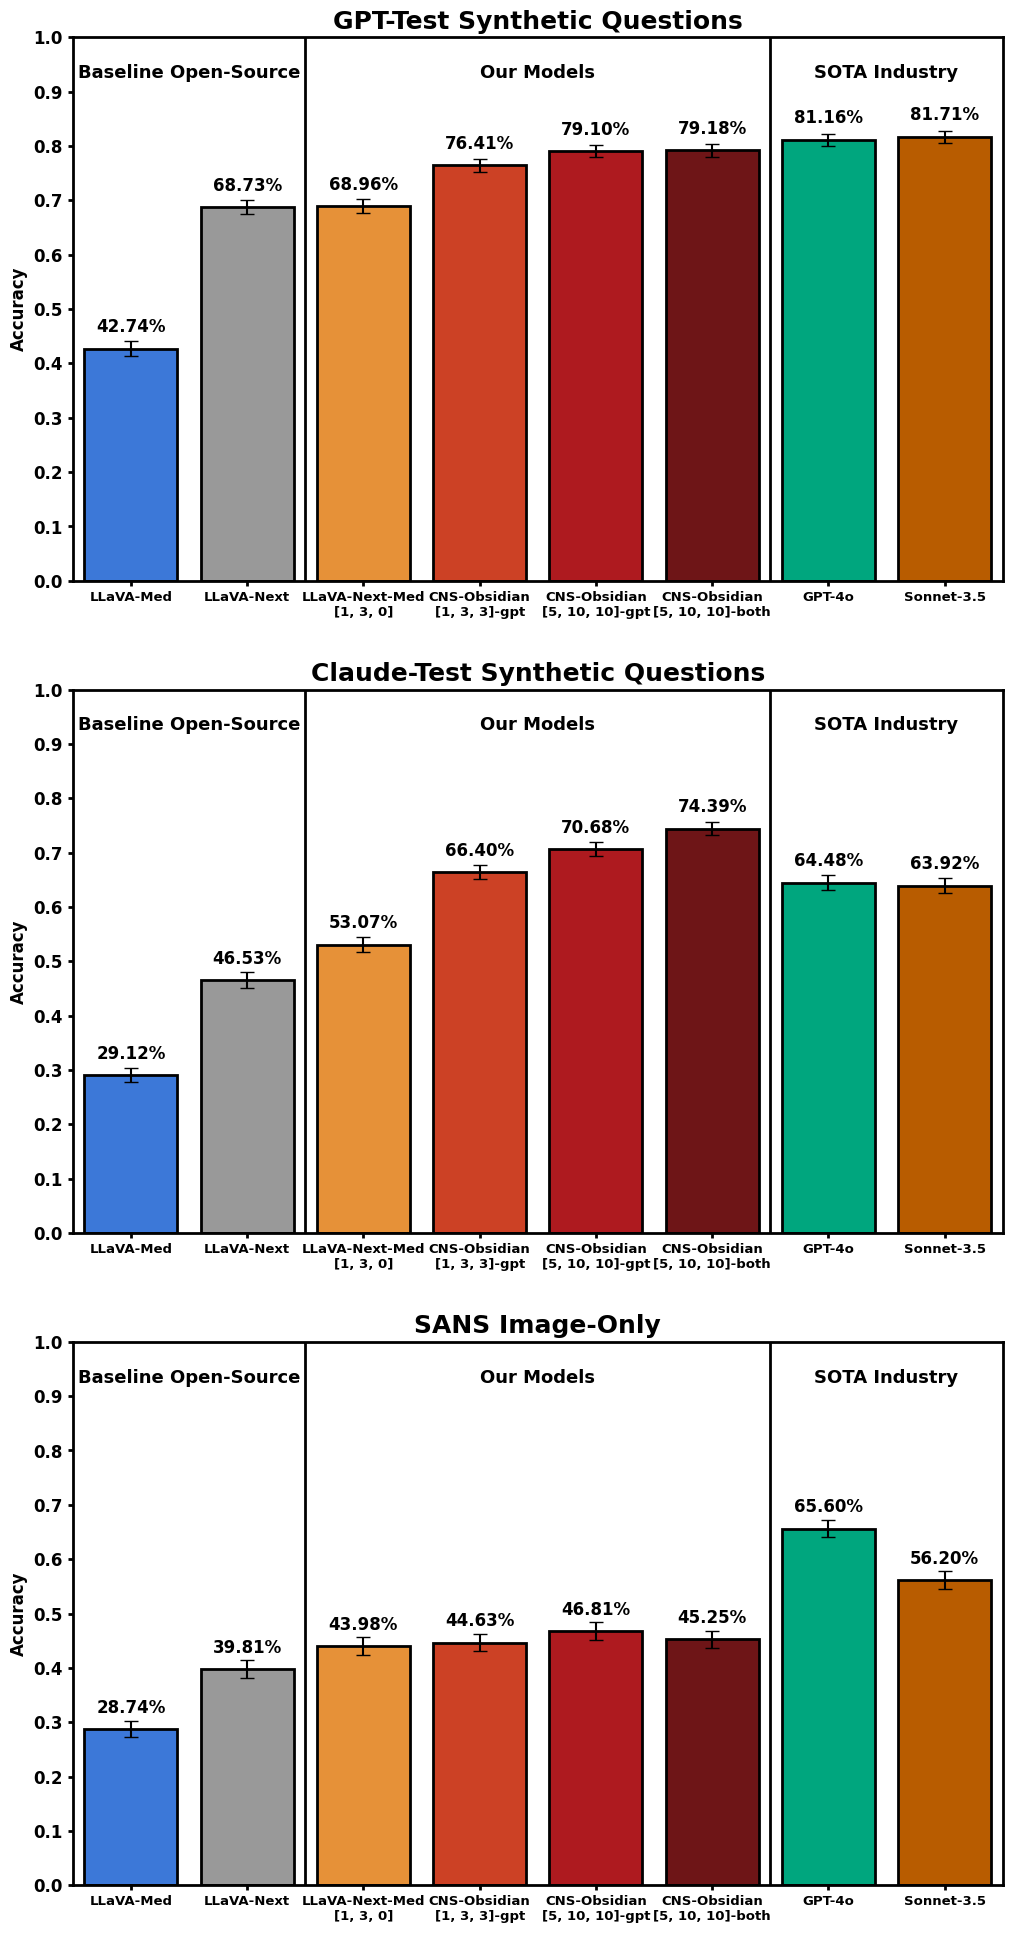

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(12, 24))
for i, ax in enumerate(axes):
    colors = [blue, grey, yellow,red_helper_1, red,  red_helper_2, green, brown ]
    dataset = [gpt_perf, claude_perf, sans_image_perf][i]
    name = ["GPT-Test Synthetic Questions", 
            "Claude-Test Synthetic Questions", 
            "SANS Image-Only",
           ][i]
    n = ns[i]
    errors = np.sqrt(np.array(list(dataset.values())) * (1 - np.array(list(dataset.values()))) / n)
    ax.bar(dataset.keys(), 
           dataset.values(),
           color = colors,
           edgecolor='black',
           linewidth=2,
           yerr=errors,
           capsize=5,
           #elinewidth=2
          )
    
    for i, value in enumerate(dataset.values()):
        ax.text(i, value + 0.03, f"{value*100:.2f}%",
                ha='center', fontsize=12, fontweight='bold')
    
    ax.plot([1.5, 1.5], [0, 1], color = 'k', linewidth=2)
    ax.plot([5.5, 5.5], [0, 1], color = 'k', linewidth=2)

    ax.set_xticks(np.arange(len(models.values())), models.values(), fontsize=9.5, fontweight='bold')
    ax.set_yticks(np.linspace(0, 1, 11), np.round(np.linspace(0, 1, 11), 1), fontsize=12, fontweight='bold')

    ax.set_ylim(0, 1)
    ax.set_xlim(-0.5, 7.5)
    
    # Make the ticks and the outer edges of the plot thicker
    ax.tick_params(axis='both', which='both', width=2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Texts
    ax.text(0.5, 0.925,
            "Baseline Open-Source",
            ha='center',
            fontsize=13,
            fontweight='bold')
    ax.text(3.5, 0.925,
            "Our Models",
            ha='center',
            fontsize=13,
            fontweight='bold')
    ax.text(6.5, 0.925,
            "SOTA Industry",
            ha='center',
            fontsize=13,
            fontweight='bold')
    ax.set_ylabel("Accuracy",
                  fontsize=12,
                  fontweight='bold')
    ax.set_title(name,
                 fontsize=18,
                 fontweight='bold')

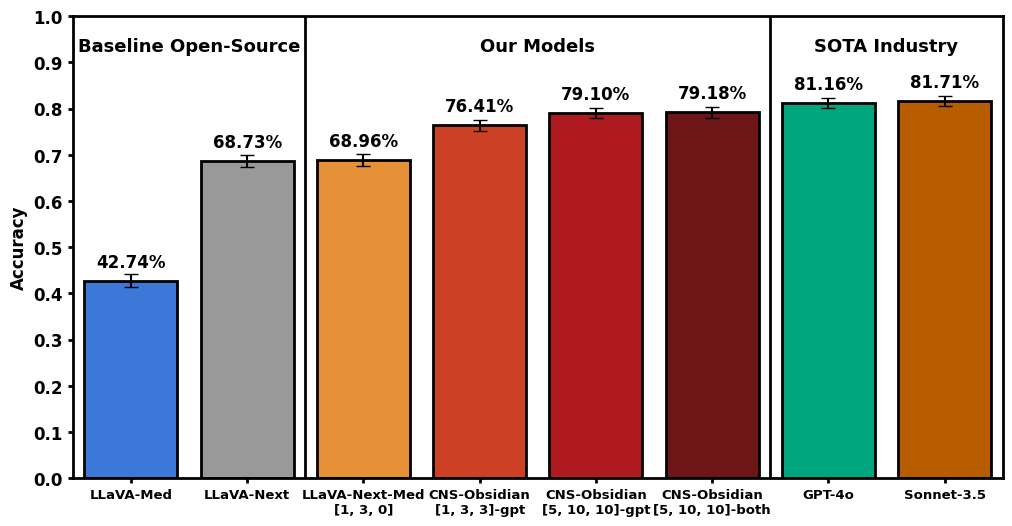

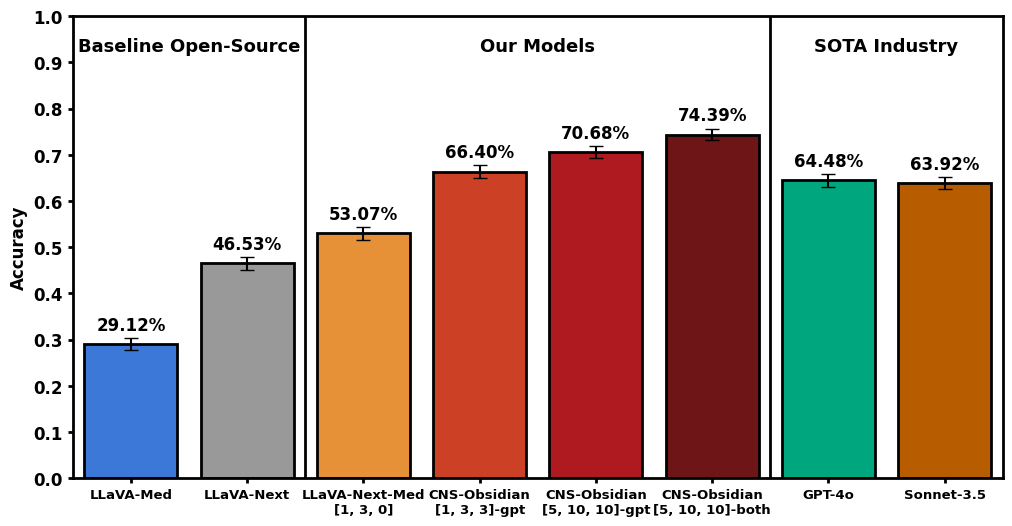

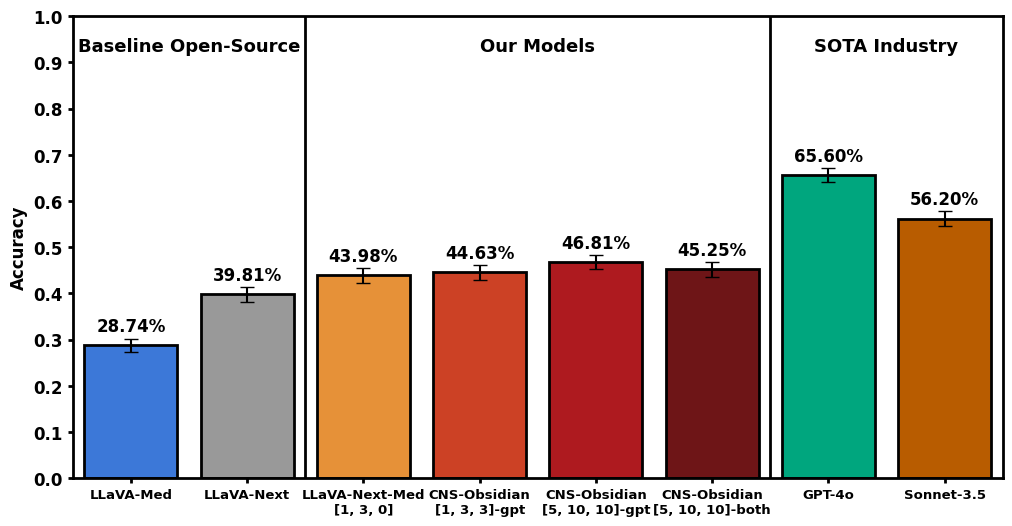

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(3):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 6))


    colors = [blue, grey, yellow,red_helper_1, red,  red_helper_2, green, brown ]
    dataset = [gpt_perf, claude_perf, sans_image_perf][i]
    name = ["GPT-Test Synthetic Questions", 
            "Claude-Test Synthetic Questions", 
            "SANS Image-Only",
           ][i]
    n = ns[i]
    errors = np.sqrt(np.array(list(dataset.values())) * (1 - np.array(list(dataset.values()))) / n)
    ax.bar(dataset.keys(), 
           dataset.values(),
           color = colors,
           edgecolor='black',
           linewidth=2,
           yerr=errors,
           capsize=5,
           #elinewidth=2
          )
    
    for j, value in enumerate(dataset.values()):
        ax.text(j, value + 0.03, f"{value*100:.2f}%",
                ha='center', fontsize=12, fontweight='bold')
    
    ax.plot([1.5, 1.5], [0, 1], color = 'k', linewidth=2)
    ax.plot([5.5, 5.5], [0, 1], color = 'k', linewidth=2)

    ax.set_xticks(np.arange(len(models.values())), models.values(), fontsize=9.5, fontweight='bold')
    ax.set_yticks(np.linspace(0, 1, 11), np.round(np.linspace(0, 1, 11), 1), fontsize=12, fontweight='bold')

    ax.set_ylim(0, 1)
    ax.set_xlim(-0.5, 7.5)
    
    # Make the ticks and the outer edges of the plot thicker
    ax.tick_params(axis='both', which='both', width=2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    # Texts
    ax.text(0.5, 0.925,
            "Baseline Open-Source",
            ha='center',
            fontsize=13,
            fontweight='bold')
    ax.text(3.5, 0.925,
            "Our Models",
            ha='center',
            fontsize=13,
            fontweight='bold')
    ax.text(6.5, 0.925,
            "SOTA Industry",
            ha='center',
            fontsize=13,
            fontweight='bold')
    ax.set_ylabel("Accuracy",
                  fontsize=12,
                  fontweight='bold')
    # ax.set_title(name,
    #              fontsize=18,
    #              fontweight='bold')
    
    # Save or display each figure
    fig.savefig(f"./figures/obsidian_figure_3{['c', 'd', 'e'][i]}.png", format='png', dpi=1200, bbox_inches='tight')
    fig.savefig(f"./figures/obsidian_figure_3{['c', 'd', 'e'][i]}.tiff", format='tiff', dpi=600, bbox_inches='tight')

In [7]:
import scipy

In [8]:
scipy.stats.fisher_exact([[1014, 1282 - 1014],
                          [1040, 1282 - 1040]], alternative='two-sided')

SignificanceResult(statistic=np.float64(0.880410447761194), pvalue=np.float64(0.21612053888783106))

In [9]:
scipy.stats.fisher_exact([[876, 1239 - 876], 
                          [799, 1239 - 799]], alternative='two-sided')

SignificanceResult(statistic=np.float64(1.3289338946410285), pvalue=np.float64(0.0010993892185750338))

In [10]:
scipy.stats.fisher_exact([[876, 1239 - 876], 
                          [792, 1239 - 792]], alternative='two-sided')

SignificanceResult(statistic=np.float64(1.362008514901077), pvalue=np.float64(0.0003754922670833035))

In [11]:
scipy.stats.fisher_exact([[445, 950 - 445], 
                          [623, 950 - 623]], alternative='two-sided')

SignificanceResult(statistic=np.float64(0.4625176803394625), pvalue=np.float64(2.2074526553148715e-16))

In [12]:
# CNS-Obsidian [5, 10, 10]-gpt vs. CNS-Obsidian [5, 10, 10]-both on three datsets.

In [13]:
scipy.stats.fisher_exact([[1015, 1282 - 1015], 
                          [1014, 1282 - 1014]], alternative='two-sided')

SignificanceResult(statistic=np.float64(1.004735205253788), pvalue=1.0)

In [14]:
scipy.stats.fisher_exact([[876, 1239 - 876], 
                          [922, 1239 - 922]], alternative='two-sided')

SignificanceResult(statistic=np.float64(0.8297090407127875), pvalue=np.float64(0.042733167132272286))

In [15]:
scipy.stats.fisher_exact([[445, 950 - 445], 
                          [430, 950 - 430]], alternative='two-sided')

SignificanceResult(statistic=np.float64(1.0656228413539028), pvalue=np.float64(0.5193431622289598))